<a href="https://colab.research.google.com/github/valazour/Tugas-Machine-Learning/blob/main/Visualizing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Plotting univariate histograms**

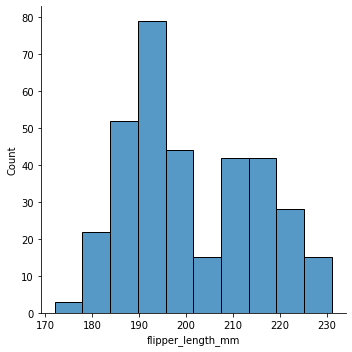

In [1]:
import seaborn as sns
import numpy as np


penguins = sns.load_dataset("penguins")
sns.displot(penguins, x="flipper_length_mm")

**Choosing the bin size**

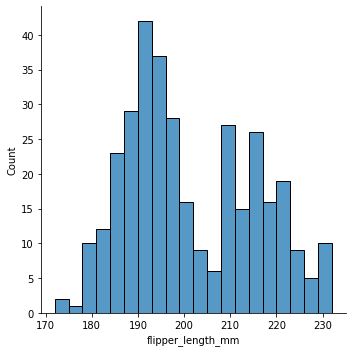

In [2]:
sns.displot(penguins, x="flipper_length_mm", binwidth=3)

In other circumstances, it may make more sense to specify the number of bins, rather than their size:

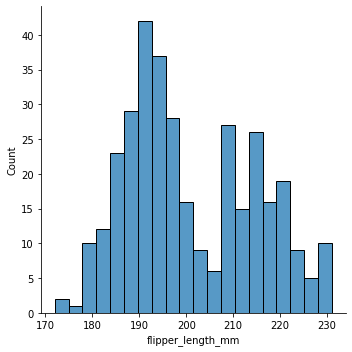

In [3]:
sns.displot(penguins, x="flipper_length_mm", bins=20)

One example of a situation where defaults fail is when the variable takes a relatively small number of integer values. In that case, the default bin width may be too small, creating awkward gaps in the distribution:

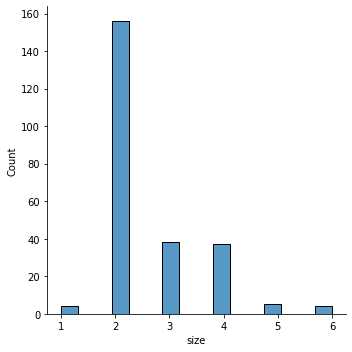

In [4]:
tips = sns.load_dataset("tips")
sns.displot(tips, x="size")

One approach would be to specify the precise bin breaks by passing an array to bins:

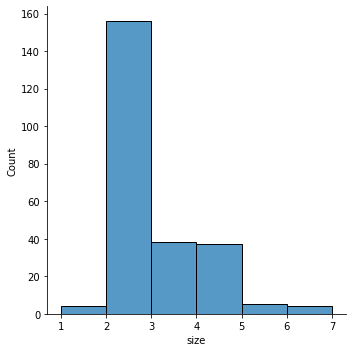

In [5]:
sns.displot(tips, x="size", bins=[1, 2, 3, 4, 5, 6, 7])

This can also be accomplished by setting discrete=True, which chooses bin breaks that represent the unique values in a dataset with bars that are centered on their corresponding value.

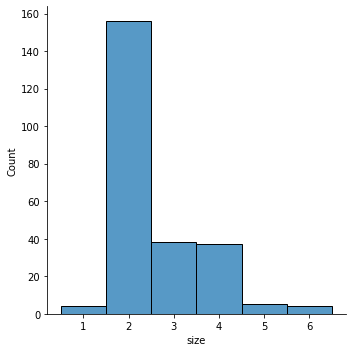

In [6]:
sns.displot(tips, x="size", discrete=True)

It’s also possible to visualize the distribution of a categorical variable using the logic of a histogram. Discrete bins are automatically set for categorical variables, but it may also be helpful to “shrink” the bars slightly to emphasize the categorical nature of the axis:

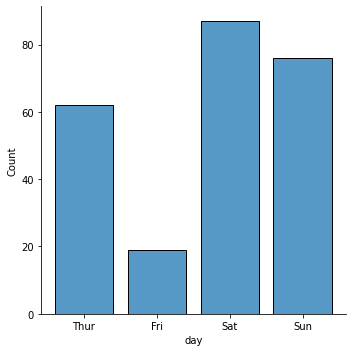

In [7]:
sns.displot(tips, x="day", shrink=.8)

**Conditioning on other variables**

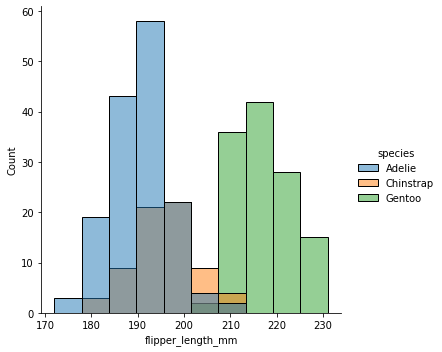

In [8]:
sns.displot(penguins, x="flipper_length_mm", hue="species")

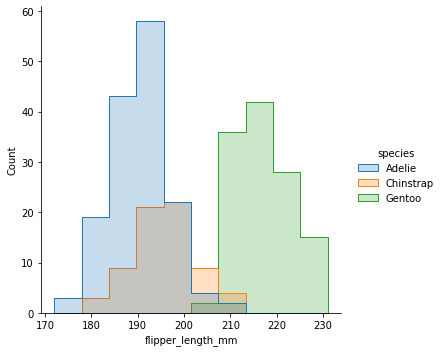

In [9]:
sns.displot(penguins, x="flipper_length_mm", hue="species", element="step")

Alternatively, instead of layering each bar, they can be “stacked”, or moved vertically. In this plot, the outline of the full histogram will match the plot with only a single variable:

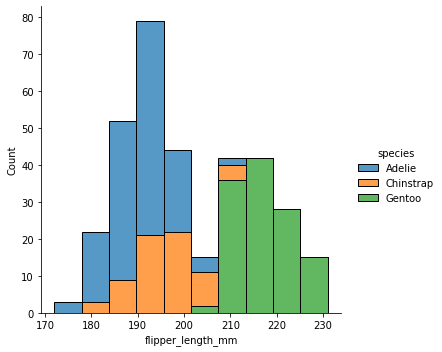

In [10]:
sns.displot(penguins, x="flipper_length_mm", hue="species", multiple="stack")

The stacked histogram emphasizes the part-whole relationship between the variables, but it can obscure other features (for example, it is difficult to determine the mode of the Adelie distribution. Another option is “dodge” the bars, which moves them horizontally and reduces their width. This ensures that there are no overlaps and that the bars remain comparable in terms of height. But it only works well when the categorical variable has a small number of levels:

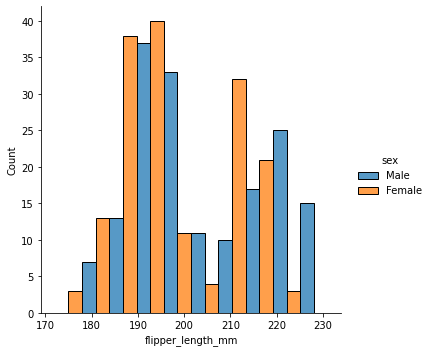

In [11]:
sns.displot(penguins, x="flipper_length_mm", hue="sex", multiple="dodge")

Because displot() is a figure-level function and is drawn onto a FacetGrid, it is also possible to draw each individual distribution in a separate subplot by assigning the second variable to col or row rather than (or in addition to) hue. This represents the distribution of each subset well, but it makes it more difficult to draw direct comparisons:

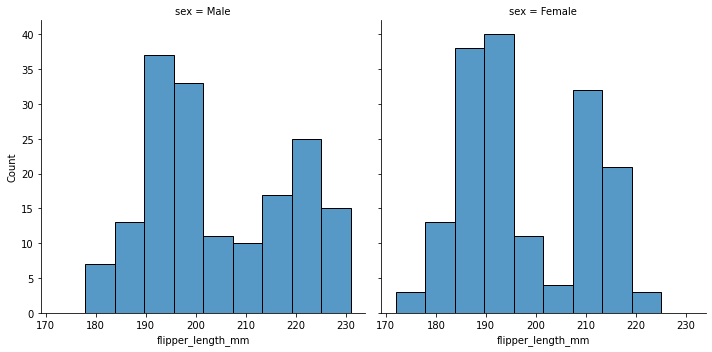

In [12]:
sns.displot(penguins, x="flipper_length_mm", col="sex")

**Normalized histogram statistics**

Before we do, another point to note is that, when the subsets have unequal numbers of observations, comparing their distributions in terms of counts may not be ideal. One solution is to normalize the counts using the stat parameter:

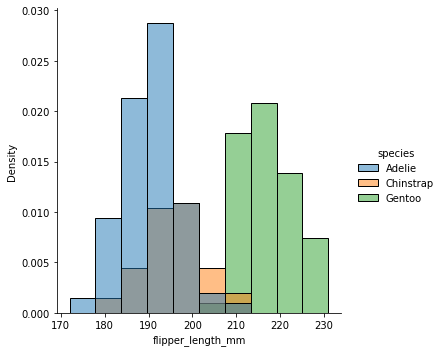

In [13]:
sns.displot(penguins, x="flipper_length_mm", hue="species", stat="density")

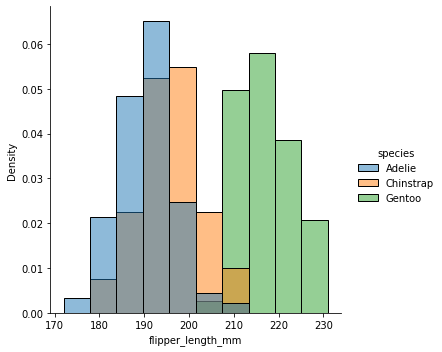

In [14]:
sns.displot(penguins, x="flipper_length_mm", hue="species", stat="density", common_norm=False)

Density normalization scales the bars so that their areas sum to 1. As a result, the density axis is not directly interpretable. Another option is to normalize the bars to that their heights sum to 1. This makes most sense when the variable is discrete, but it is an option for all histograms:

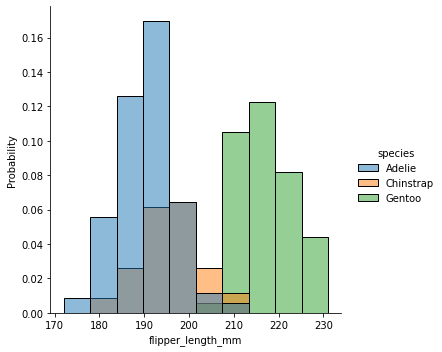

In [15]:
sns.displot(penguins, x="flipper_length_mm", hue="species", stat="probability")

**Kernel density estimation**

A histogram aims to approximate the underlying probability density function that generated the data by binning and counting observations. Kernel density estimation (KDE) presents a different solution to the same problem. Rather than using discrete bins, a KDE plot smooths the observations with a Gaussian kernel, producing a continuous density estimate:

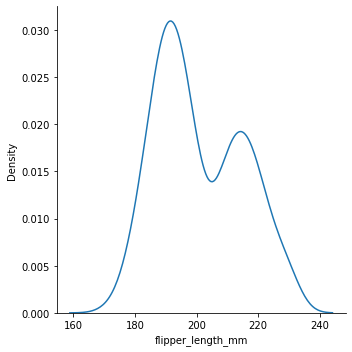

In [16]:
sns.displot(penguins, x="flipper_length_mm", kind="kde")

**Choosing the smoothing bandwidth**

Much like with the bin size in the histogram, the ability of the KDE to accurately represent the data depends on the choice of smoothing bandwidth. An over-smoothed estimate might erase meaningful features, but an under-smoothed estimate can obscure the true shape within random noise. The easiest way to check the robustness of the estimate is to adjust the default bandwidth:

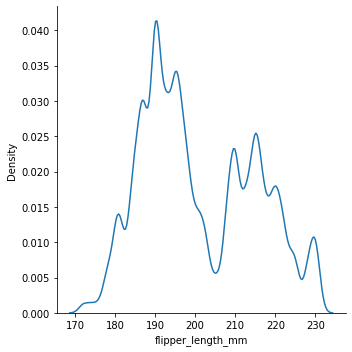

In [17]:
sns.displot(penguins, x="flipper_length_mm", kind="kde", bw_adjust=.25)

Note how the narrow bandwidth makes the bimodality much more apparent, but the curve is much less smooth. In contrast, a larger bandwidth obscures the bimodality almost completely:

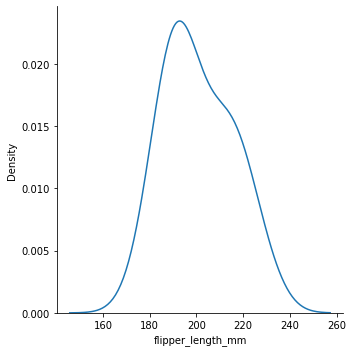

In [18]:
sns.displot(penguins, x="flipper_length_mm", kind="kde", bw_adjust=2)

**Conditioning on other variables**

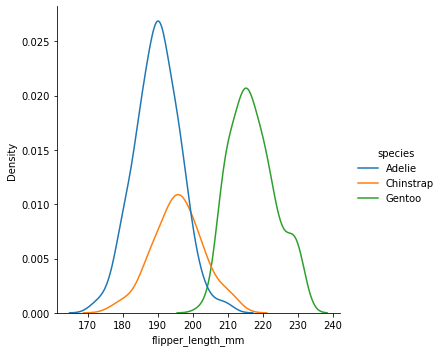

In [19]:
sns.displot(penguins, x="flipper_length_mm", hue="species", kind="kde")

in many cases, the layered KDE is easier to interpret than the layered histogram, so it is often a good choice for the task of comparison. Many of the same options for resolving multiple distributions apply to the KDE as well, however:

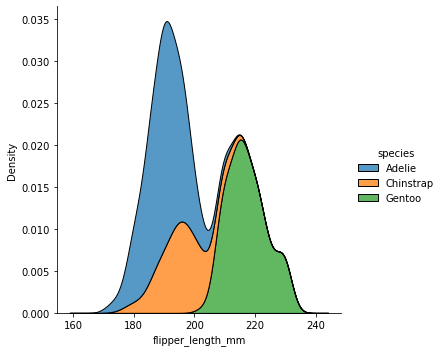

In [20]:
sns.displot(penguins, x="flipper_length_mm", hue="species", kind="kde", multiple="stack")

Note how the stacked plot filled in the area between each curve by default. It is also possible to fill in the curves for single or layered densities, although the default alpha value (opacity) will be different, so that the individual densities are easier to resolve.

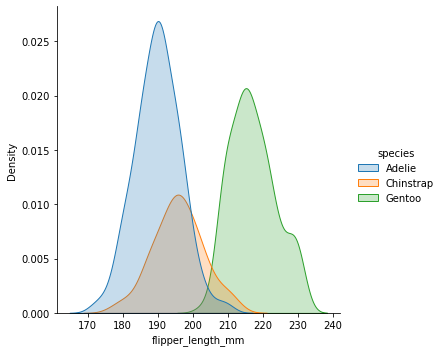

In [21]:
sns.displot(penguins, x="flipper_length_mm", hue="species", kind="kde", fill=True)